In [7]:
from random import shuffle
import pandas as pd
import numpy as np
import math
import scipy
import scipy.stats
import matplotlib.pyplot as plt

In [8]:
def reward_vector(num_arms):
    return np.linspace(0.1,0.9,num_arms)

In [41]:
class Experiment:
    def __init__(self, iterations, num_arms):
        self.reward_vector= reward_vector(num_arms)
        self.iterations = iterations
        self.num_arms = num_arms
        self.reward_matrix = np.zeros((num_arms, iterations))
        self.random_adversarial_reward_matrix = np.zeros((2,iterations))
        self.random_cumulative_adversarial_reward_per_arm = np.zeros((2, iterations))
        self.random_best_cumulative_adversarial_reward_per_round = np.zeros((2, iterations))
        self.ucb_adversarial_reward_matrix = np.zeros((2,iterations))
        self.ucb_cumulative_adversarial_reward_per_arm = np.zeros((2, iterations))
        self.ucb_best_cumulative_adversarial_reward_per_round = np.zeros((2, iterations))
        self.Thomason_adversarial_reward_matrix = np.zeros((2,iterations))
        self.Thomason_cumulative_adversarial_reward_per_arm = np.zeros((2, iterations))
        self.Thomason_best_cumulative_adversarial_reward_per_round = np.zeros((2, iterations))
        for i in range(0,num_arms):
            for j in range(0,iterations):
                self.reward_matrix[i,j] = np.random.binomial(1,self.reward_vector[i],1)[0]
        self.cumulative_reward_per_arm = np.zeros((num_arms, iterations))
        for i in range(0,num_arms):
            for j in range(0,iterations):
                self.cumulative_reward_per_arm[i,j] = np.sum(self.reward_matrix[i,0:j+1])
        self.best_cumulative_reward_per_round = np.insert(np.max(self.cumulative_reward_per_arm,axis = 0),0,0)
    def random_adversarial_reward(self,choice, iteration):
        if self.iterations -1 == iteration:
            for i in range(0,2):
                for j in range(0,self.iterations):
                    self.random_cumulative_adversarial_reward_per_arm[i,j] = np.sum(self.random_adversarial_reward_matrix[i,0:j+1])
            self.random_best_cumulative_adversarial_reward_per_round = np.insert(np.max(self.random_cumulative_adversarial_reward_per_arm,axis = 0),0,0)
            return
        if choice == 0 and self.random_adversarial_reward_matrix[choice,iteration] == 0:
            self.random_adversarial_reward_matrix[0, iteration+1] = 1
            self.random_adversarial_reward_matrix[1, iteration+1] = 0
        elif choice == 0 and self.random_adversarial_reward_matrix[choice,iteration] == 1:
            self.random_adversarial_reward_matrix[0, iteration+1] = 0
            self.random_adversarial_reward_matrix[1, iteration+1] = 1
        elif choice == 1 and self.random_adversarial_reward_matrix[choice,iteration] == 0:
            self.random_adversarial_reward_matrix[0, iteration+1] = 0
            self.random_adversarial_reward_matrix[1, iteration+1] = 1
        elif choice == 1 and self.random_adversarial_reward_matrix[choice,iteration] == 1:
            self.random_adversarial_reward_matrix[0, iteration+1] = 1
            self.random_adversarial_reward_matrix[1, iteration+1] = 0
    def ucb_adversarial_reward(self,choice, iteration):
        if self.iterations -1 == iteration:
            for i in range(0,2):
                for j in range(0,self.iterations):
                    self.ucb_cumulative_adversarial_reward_per_arm[i,j] = np.sum(self.ucb_adversarial_reward_matrix[i,0:j+1])
            self.ucb_best_cumulative_adversarial_reward_per_round = np.insert(np.max(self.ucb_cumulative_adversarial_reward_per_arm,axis = 0),0,0)
            return
        if choice == 0 and self.ucb_adversarial_reward_matrix[choice,iteration] == 0:
            self.ucb_adversarial_reward_matrix[0, iteration+1] = 1
            self.ucb_adversarial_reward_matrix[1, iteration+1] = 0
        elif choice == 0 and self.ucb_adversarial_reward_matrix[choice,iteration] == 1:
            self.ucb_adversarial_reward_matrix[0, iteration+1] = 0
            self.ucb_adversarial_reward_matrix[1, iteration+1] = 1
        elif choice == 1 and self.ucb_adversarial_reward_matrix[choice,iteration] == 0:
            self.ucb_adversarial_reward_matrix[0, iteration+1] = 0
            self.ucb_adversarial_reward_matrix[1, iteration+1] = 1
        elif choice == 1 and self.ucb_adversarial_reward_matrix[choice,iteration] == 1:
            self.ucb_adversarial_reward_matrix[0, iteration+1] = 1
            self.ucb_adversarial_reward_matrix[1, iteration+1] = 0
    def Thomason_adversarial_reward(self,choice, iteration):
        if self.iterations -1 == iteration:
            for i in range(0,2):
                for j in range(0,self.iterations):
                    self.Thomason_cumulative_adversarial_reward_per_arm[i,j] = np.sum(self.Thomason_adversarial_reward_matrix[i,0:j+1])
            self.Thomason_best_cumulative_adversarial_reward_per_round = np.insert(np.max(self.Thomason_cumulative_adversarial_reward_per_arm,axis = 0),0,0)
            return
        if choice == 0 and self.Thomason_adversarial_reward_matrix[choice,iteration] == 0:
            self.Thomason_adversarial_reward_matrix[0, iteration+1] = 1
            self.Thomason_adversarial_reward_matrix[1, iteration+1] = 0
        elif choice == 0 and self.Thomason_adversarial_reward_matrix[choice,iteration] == 1:
            self.Thomason_adversarial_reward_matrix[0, iteration+1] = 0
            self.Thomason_adversarial_reward_matrix[1, iteration+1] = 1
        elif choice == 1 and self.Thomason_adversarial_reward_matrix[choice,iteration] == 0:
            self.Thomason_adversarial_reward_matrix[0, iteration+1] = 0
            self.Thomason_adversarial_reward_matrix[1, iteration+1] = 1
        elif choice == 1 and self.Thomason_adversarial_reward_matrix[choice,iteration] == 1:
            self.Thomason_adversarial_reward_matrix[0, iteration+1] = 1
            self.Thomason_adversarial_reward_matrix[1, iteration+1] = 0
    def random(self):
        cumulative_reward = [0]
        for i in range(0,self.iterations):
            choice = np.random.randint(0,self.num_arms)
            reward = self.reward_matrix[choice, i]
            cumulative_reward.append(cumulative_reward[i]+reward)
        return np.array(cumulative_reward), self.best_cumulative_reward_per_round - np.array(cumulative_reward)
    def Thomason_Sampling_adversarial(self):
        cumulative_reward = [0]
        Alpha = np.ones(2)
        Beta = np.ones(2)
        for i in range(0,self.iterations):
            thetas = np.random.beta(Alpha, Beta)
            max_idx = np.argmax(thetas)
            reward = self.Thomason_adversarial_reward_matrix[max_idx, i]
            self.Thomason_adversarial_reward(max_idx, i)
            Alpha[max_idx] += reward
            Beta[max_idx] += 1-reward
            cumulative_reward.append(cumulative_reward[i]+reward)
        return np.array(cumulative_reward), self.Thomason_best_cumulative_adversarial_reward_per_round - np.array(cumulative_reward),self.Thomason_best_cumulative_adversarial_reward_per_round
    def UCB_adversarial(self):
        cumulative_reward = [0]
        num_actions = np.zeros(2)
        total_reward = np.zeros(2)
        average_reward = np.zeros(2)
        # Play each action once
        for i in range(0,self.iterations):
            if (i < 2):
                reward = self.ucb_adversarial_reward_matrix[i,i]
                self.ucb_adversarial_reward(i, i)
                cumulative_reward.append(cumulative_reward[i]+reward)
                average_reward[i] += reward
                total_reward[i] += reward
                num_actions[i] += 1
            else:
                temp = average_reward + np.sqrt(2*math.log(i)/num_actions)
                max_idx = np.argmax(temp)
                self.ucb_adversarial_reward(max_idx, i)
                reward = self.ucb_adversarial_reward_matrix[max_idx, i]
                cumulative_reward.append(cumulative_reward[i]+reward)
                total_reward[max_idx] += reward
                num_actions[max_idx] += 1
                average_reward = total_reward / num_actions
        return np.array(cumulative_reward), self.ucb_best_cumulative_adversarial_reward_per_round - np.array(cumulative_reward), self.ucb_best_cumulative_adversarial_reward_per_round
    def random_adversarial(self):
        cumulative_reward = [0]
        for i in range(0,self.iterations):
            choice = np.random.randint(0,2)
            self.random_adversarial_reward(choice, i)
            reward = self.random_adversarial_reward_matrix[choice, i]
            cumulative_reward.append(cumulative_reward[i]+reward)
        return np.array(cumulative_reward), self.random_best_cumulative_adversarial_reward_per_round - np.array(cumulative_reward),self.random_best_cumulative_adversarial_reward_per_round
    def Thomason_Sampling(self):
        cumulative_reward = [0]
        Alpha = np.ones(self.num_arms)
        Beta = np.ones(self.num_arms)
        for i in range(0,self.iterations):
            thetas = np.random.beta(Alpha, Beta)
            max_idx = np.argmax(thetas)
            reward = self.reward_matrix[max_idx, i]
            Alpha[max_idx] += reward
            Beta[max_idx] += 1-reward
            cumulative_reward.append(cumulative_reward[i]+reward)
        return np.array(cumulative_reward), self.best_cumulative_reward_per_round - np.array(cumulative_reward)
    def UCB(self):
        cumulative_reward = [0]
        num_actions = np.zeros(self.num_arms)
        total_reward = np.zeros(self.num_arms)
        average_reward = np.zeros(self.num_arms)
        # Play each action once
        for i in range(0,self.iterations):
            if (i < self.num_arms):
                reward = self.reward_matrix[i,i]
                cumulative_reward.append(cumulative_reward[i]+reward)
                average_reward[i] += reward
                total_reward[i] += reward
                num_actions[i] += 1
            else:
                temp = average_reward + np.sqrt(2*math.log(i)/num_actions)
                max_idx = np.argmax(temp)
                reward = self.reward_matrix[max_idx, i]
                cumulative_reward.append(cumulative_reward[i]+reward)
                total_reward[max_idx] += reward
                num_actions[max_idx] += 1
                average_reward = total_reward / num_actions
        return np.array(cumulative_reward), self.best_cumulative_reward_per_round - np.array(cumulative_reward)
            
    

In [46]:
adverarial_regret_ucbs = []
adverarial_regret_randoms = []
adverarial_regret_Thomsons = []
for i in range(0,100):
    print(i)
    exp = Experiment(10000, 20)
    reward, regret,bre_random = exp.random_adversarial()
    r,re,bre_thomason = exp.Thomason_Sampling_adversarial()
    r_ucb, regret_ucb, bre_ucb = exp.UCB_adversarial()
    adverarial_regret_ucbs.append(regret_ucb)
    adverarial_regret_randoms.append(regret)
    adverarial_regret_Thomsons.append(re)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [48]:
adverarial_regret_ucbs = np.array(adverarial_regret_ucbs)
adverarial_regret_randoms = np.array(adverarial_regret_randoms)
adverarial_regret_Thomsons = np.array(adverarial_regret_Thomsons)

In [49]:
regret_Thomsons_adversarial_mean = np.mean(adverarial_regret_Thomsons, axis = 0)
regret_ucbs_adversarial_mean = np.mean(adverarial_regret_ucbs, axis = 0)
regret_Thomsons_adversarial_var = np.var(adverarial_regret_Thomsons, axis = 0)
regret_ucbs_adversarial_var = np.var(adverarial_regret_ucbs, axis = 0)

In [47]:
regret_ucbs = []
regret_randoms = []
regret_Thomsons = []
for i in range(0,100):
    print(i)
    exp = Experiment(10000, 20)
    reward, regret = exp.random()
    r,re = exp.Thomason_Sampling()
    r_ucb, regret_ucb = exp.UCB()
    regret_ucbs.append(regret_ucb)
    regret_randoms.append(regret)
    regret_Thomsons.append(re)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [54]:
def mean_confidence_interval(data, confidence=0.90):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [55]:
upper_bounds = [math.sqrt(20*i*math.log2(i)) for i in range(1,10001)]
lower_bounds = [0]+[math.sqrt(i*20) / 20 for i in range(1,10001)]

In [56]:
regret_ucbs = np.array(regret_ucbs)
regret_randoms = np.array(regret_randoms)
regret_Thomsons = np.array(regret_Thomsons)

In [80]:
regret_Thomsons_mean[-1]

104.02

In [57]:
regret_Thomsons_mean = np.mean(regret_Thomsons, axis = 0)
regret_ucbs_mean = np.mean(regret_ucbs, axis = 0)
regret_Thomsons_var = np.var(regret_Thomsons, axis = 0)
regret_ucbs_var = np.var(regret_ucbs, axis = 0)

In [58]:
upper_thomson_adversarial_conf = []
lower_thomson_adversarial_conf = []
for i in range(0,10001):
    m,l,h = mean_confidence_interval(adverarial_regret_Thomsons[:,i])
    upper_thomson_adversarial_conf.append(h)
    lower_thomson_adversarial_conf.append(l)

In [59]:
upper_ucb_adversarial_conf = []
lower_ucb_adversarial_conf = []
for i in range(0,10001):
    m,l,h = mean_confidence_interval(adverarial_regret_Thomsons[:,i])
    upper_ucb_adversarial_conf.append(h)
    lower_ucb_adversarial_conf.append(l)

In [60]:
upper_thomson_conf = []
lower_thomson_conf = []
for i in range(0,10001):
    m,l,h = mean_confidence_interval(regret_Thomsons[:,i])
    upper_thomson_conf.append(h)
    lower_thomson_conf.append(l)

In [61]:
upper_ucb_conf = []
lower_ucb_conf = []
for i in range(0,10001):
    m,l,h = mean_confidence_interval(regret_ucbs[:,i])
    upper_ucb_conf.append(h)
    lower_ucb_conf.append(l)

In [63]:
indices = np.array([i for i in range(0,10001)])

Text(0.5, 1.0, 'Round vs Cumulative Pseudo Regret for UCB and Thompson ')

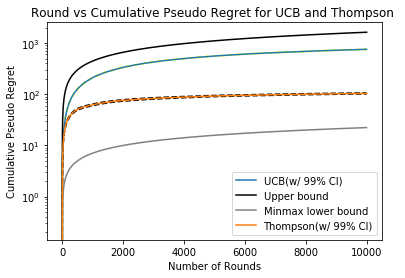

In [77]:
plt.semilogy(indices,upper_ucb_conf, 'k--',  color = 'yellow')
plt.semilogy(indices,lower_ucb_conf, 'k--',  color = 'yellow')
plt.semilogy(indices,upper_thomson_conf, 'k--')
plt.semilogy(indices,lower_thomson_conf, 'k--')
plt.semilogy(indices,regret_ucbs_mean, label = "UCB(w/ 99% CI)")
plt.semilogy(indices,[0] + upper_bounds, label = "Upper bound", color = 'black')
plt.semilogy(indices, lower_bounds, label = "Minmax lower bound", color = 'gray')
plt.semilogy(indices, regret_Thomsons_mean, label = "Thompson(w/ 99% CI)")
plt.legend(loc='best')
plt.xlabel('Number of Rounds')
plt.ylabel('Cumulative Pseudo Regret')
plt.title('Round vs Cumulative Pseudo Regret for UCB and Thompson ')

Text(0.5, 1.0, 'Round vs Cumulative Pseudo Regret for UCB and Thompson\n in the Adversarial Setting')

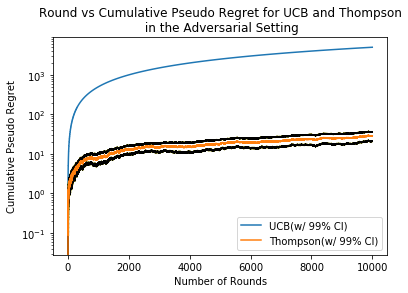

In [78]:
plt.semilogy(indices,regret_ucbs_adversarial_mean, label = "UCB(w/ 99% CI)")
plt.semilogy(indices,upper_ucb_adversarial_conf, 'k--',  color = 'yellow')
plt.semilogy(indices,lower_ucb_adversarial_conf, 'k--',  color = 'yellow')
plt.semilogy(indices,upper_thomson_adversarial_conf, 'k--')
plt.semilogy(indices,lower_thomson_adversarial_conf, 'k--')
plt.semilogy(indices, regret_Thomsons_adversarial_mean, label = "Thompson(w/ 99% CI)")
plt.legend(loc='best')
plt.xlabel('Number of Rounds')
plt.ylabel('Cumulative Pseudo Regret')
plt.title('Round vs Cumulative Pseudo Regret for UCB and Thompson\n in the Adversarial Setting')